# SeaIce-Prediction

### how does the extantion of seaice influence the climate?  
- discription of topic and goal of the project  
- for what/whom is it important to know?

In [1]:
#import of the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftplib import FTP
import os
import warnings

warnings.filterwarnings('ignore')

## Data on daily basis

#### Loading the daily data for seaice extent

In [2]:
#code from https://nsidc.org/support/64231694-FTP-Client-Data-Access
#!/usr/bin/env python
# NSIDC
# Sample script to download all the files within one directory on the FTP server
#
# Requires Python3 and the ftplib and os libraries

### The following 3 variables can be changed ###
# 1. Set the directory you would like to download the files to
destdir='../data'

# 2. Set the path to the FTP directory that contains the data you wish to download.
# This example is for the daily northern hemisphere data from the Sea Ice Index
# https://nsidc.org/data/g02135
directory = '/DATASETS/NOAA/G02135/north/daily/data'

# 3. Set the password which will be your email address
password = 'kaddygorrissen@gmail.com'

############################################
### Don't need to change this code below ###
############################################
# FTP server
ftpdir = 'sidads.colorado.edu'

#Connect and log in to the FTP
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('anonymous',password)

# Change to the directory where the files are on the FTP
print('Changing to '+ directory)
ftp.cwd(directory)

# Get a list of the files in the FTP directory
files = ftp.nlst()
files = files[2:]
print(files)

#Change to the destination directory on own computer where you want to save the files
os.chdir(destdir)

#Download all the files within the FTP directory
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)

#Close the FTP connection
ftp.quit()

Logging in
Changing to /DATASETS/NOAA/G02135/north/daily/data
['N_seaice_extent_climatology_1981-2010_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv.bak']
Downloading...N_seaice_extent_climatology_1981-2010_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv.bak


'221-Goodbye. You uploaded 0 and downloaded 3845 kbytes.\n221 Logout.'

In [ ]:
#the same for the southern hemisphere
# 1. Set the directory you would like to download the files to
destdir='../data'

# 2. Set the path to the FTP directory that contains the data you wish to download.
# This example is for the daily southern hemisphere data from the Sea Ice Index
# https://nsidc.org/data/g02135
directory = '/DATASETS/NOAA/G02135/south/daily/data'

# 3. Set the password which will be your email address
password = 'kaddygorrissen@gmail.com'

############################################
### Don't need to change this code below ###
############################################
# FTP server
ftpdir = 'sidads.colorado.edu'

#Connect and log in to the FTP
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('anonymous',password)

# Change to the directory where the files are on the FTP
print('Changing to '+ directory)
ftp.cwd(directory)

# Get a list of the files in the FTP directory
files = ftp.nlst()
files = files[2:]
print(files)

#Change to the destination directory on own computer where you want to save the files
os.chdir(destdir)

#Download all the files within the FTP directory
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)

#Close the FTP connection
ftp.quit()

Logging in
Changing to /DATASETS/NOAA/G02135/south/daily/data
['S_seaice_extent_climatology_1981-2010_v3.0.csv', 'S_seaice_extent_daily_v3.0.csv', 'S_seaice_extent_daily_v3.0.csv.bak']
Downloading...S_seaice_extent_climatology_1981-2010_v3.0.csv
Downloading...S_seaice_extent_daily_v3.0.csv
Downloading...S_seaice_extent_daily_v3.0.csv.bak


'221-Goodbye. You uploaded 0 and downloaded 3848 kbytes.\n221 Logout.'

In [4]:
df_s = pd.read_csv('../data/S_seaice_extent_daily_v3.0.csv')
df_s.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


##### Exploring the data

In [5]:
df_n = pd.read_csv('../data/N_seaice_extent_daily_v3.0.csv')
df_n.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [6]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          14187 non-null  object
 1    Month        14187 non-null  object
 2    Day          14187 non-null  object
 3        Extent   14187 non-null  object
 4       Missing   14187 non-null  object
 5    Source Data  14187 non-null  object
dtypes: object(6)
memory usage: 665.1+ KB


In [7]:
#drop first row because it's the description
df_n1 = df_n.iloc[1:,:]
df_n1.head()

,Year,Month,Day,Extent,Missing,Source Data
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


In [8]:
df_n1.columns[1]

' Month'

In [9]:
#changing the column-names because there is a space in front of Month and Day
df_n1.rename(columns={ df_n1.columns[1]: "month"}, inplace=True)
df_n1.rename(columns={ df_n1.columns[2]: "day"}, inplace=True)
df_n1.head()

,Year,month,day,Extent,Missing,Source Data
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


In [10]:
#change the date columns to pd.to_datetime
df_n1['date'] = pd.to_datetime(df_n1[['Year', 'month', 'day']])
df_n1.head()

,Year,month,day,Extent,Missing,Source Data,date
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...,1978-10-26
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...,1978-10-28
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...,1978-10-30
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...,1978-11-01
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...,1978-11-03


In [11]:
df_n1.rename(columns={ df_n1.columns[3]: "extent"}, inplace=True)
df_n1.head()

,Year,month,day,extent,Missing,Source Data,date
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...,1978-10-26
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...,1978-10-28
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...,1978-10-30
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...,1978-11-01
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...,1978-11-03


In [12]:
#general plot settings
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)
plt.rc('figure',figsize=(16, 9)) 
plt.rcParams['axes.labelweight'] = 'bold'


<AxesSubplot:xlabel='date'>

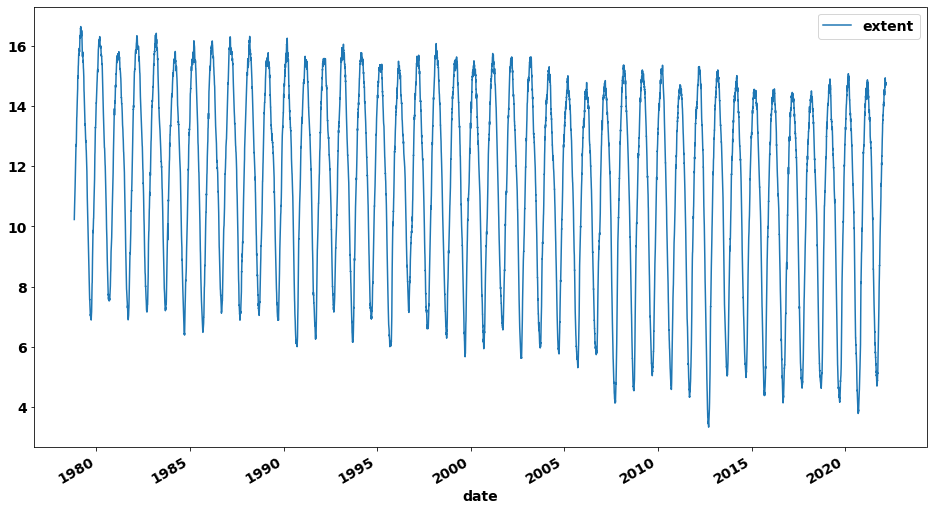

In [13]:
df_n1['extent'] = df_n1['extent'].astype(float)
df_n1.plot(x='date', y='extent')

### Monthly Data

In [14]:
# NSIDC monthly Sea ice extent, 25 km resolution, Northern hemisphere
# the data is in separate csv.-file for each month
# creating a complete unsorted csv.-file

import glob

path = r'../data/n_monthly' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.tail()

,year,mo,data-type,region,extent,area
515,2017,6,Goddard,N,10.76,8.63
516,2018,6,Goddard,N,10.78,8.79
517,2019,6,Goddard,N,10.59,8.32
518,2020,6,Goddard,N,10.59,8.41
519,2021,6,NRTSI-G,N,10.71,8.38


In [15]:
# add a column for the day
frame['day'] = 1
frame.head()

,year,mo,data-type,region,extent,area,day
0,1979,3,Goddard,N,16.34,13.21,1
1,1980,3,Goddard,N,16.04,12.99,1
2,1981,3,Goddard,N,15.63,12.71,1
3,1982,3,Goddard,N,16.04,13.07,1
4,1983,3,Goddard,N,16.09,12.93,1


In [16]:
#rename the columns because of spaces in front of the name and create a datetime
frame.rename(columns={ frame.columns[1]: "month"}, inplace=True)
frame['date'] = pd.to_datetime(frame[['year', 'month', 'day']])
frame.head()

,year,month,data-type,region,extent,area,day,date
0,1979,3,Goddard,N,16.34,13.21,1,1979-03-01
1,1980,3,Goddard,N,16.04,12.99,1,1980-03-01
2,1981,3,Goddard,N,15.63,12.71,1,1981-03-01
3,1982,3,Goddard,N,16.04,13.07,1,1982-03-01
4,1983,3,Goddard,N,16.09,12.93,1,1983-03-01


In [17]:
#sorting by date and reset the index
frame.sort_values(by='date', inplace=True)
frame = frame.reset_index(drop=True)
frame.head()

,year,month,data-type,region,extent,area,day,date
0,1978,11,Goddard,N,11.65,9.04,1,1978-11-01
1,1978,12,Goddard,N,13.67,10.90,1,1978-12-01
2,1979,1,Goddard,N,15.41,12.41,1,1979-01-01
3,1979,2,Goddard,N,16.18,13.18,1,1979-02-01
4,1979,3,Goddard,N,16.34,13.21,1,1979-03-01


In [18]:
type(frame.date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
#rename the columns because of spaces in front of the name
frame.rename(columns={ frame.columns[2]: "data_type"}, inplace=True)
frame.rename(columns={ frame.columns[3]: "region"}, inplace=True)
frame.rename(columns={ frame.columns[4]: "extent"}, inplace=True)
frame.rename(columns={ frame.columns[5]: "area"}, inplace=True)

df_month = frame[['date','data_type','region','extent','area','year','month']]
df_month.head()

,date,data_type,region,extent,area,year,month
0,1978-11-01,Goddard,N,11.65,9.04,1978,11
1,1978-12-01,Goddard,N,13.67,10.90,1978,12
2,1979-01-01,Goddard,N,15.41,12.41,1979,1
3,1979-02-01,Goddard,N,16.18,13.18,1979,2
4,1979-03-01,Goddard,N,16.34,13.21,1979,3


In [20]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       520 non-null    datetime64[ns]
 1   data_type  520 non-null    object        
 2   region     520 non-null    object        
 3   extent     520 non-null    float64       
 4   area       520 non-null    float64       
 5   year       520 non-null    int64         
 6   month      520 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 28.6+ KB


In [21]:
df_month.describe()

,extent,area,year,month
count,520.000000,520.000000,520.000000,520.000000
mean,-27.110231,-48.453846,2000.000000,6.500000
std,620.228247,758.724674,12.523581,3.470215
min,-9999.000000,-9999.000000,1978.000000,1.000000
25%,8.547500,6.227500,1989.000000,3.000000
50%,12.060000,9.930000,2000.000000,6.500000
75%,14.300000,12.282500,2011.000000,10.000000
max,16.340000,13.900000,2022.000000,12.000000


In [22]:
#although there are no missing values there are min values of -9999 in the extent and area column
#replacing the -9999 values in extent and area

for index, val in enumerate(df_month['extent']):
    if val == -9999:
        df_month['extent'].loc[index] = df_month['extent'].loc[index - 12]

for index, val in enumerate(df_month['area']):
    if val == -9999:
        df_month['area'].loc[index] = df_month['area'].loc[index - 12]  

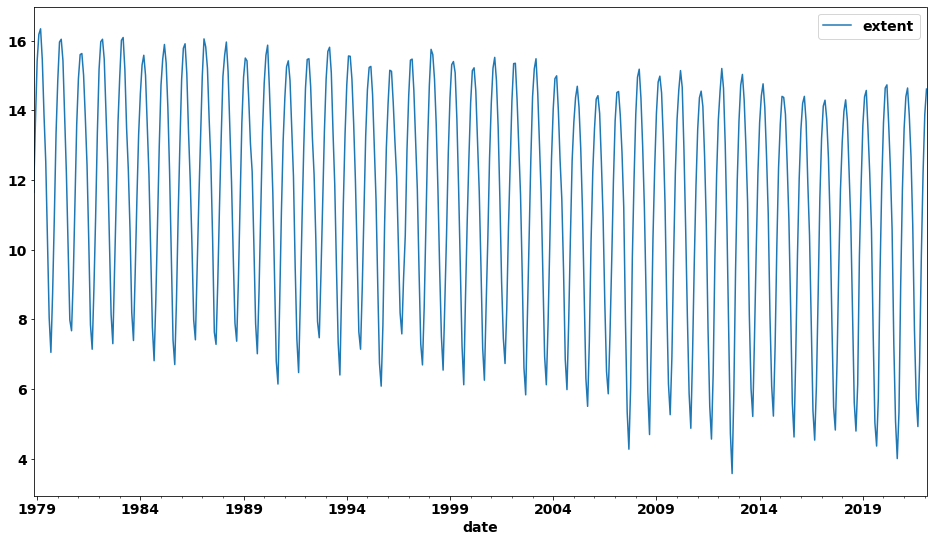

In [23]:
df_month.plot(x='date', y='extent');

#### Masie-Data

In [24]:
df_masie = pd.read_csv('../data/masie_4km_allyears_extent_sqkm.csv')
df_masie.head()

,yyyyddd,(0) Northern_Hemisphere,(1) Beaufort_Sea,(2) Chukchi_Sea,(3) East_Siberian_Sea,(4) Laptev_Sea,(5) Kara_Sea,(6) Barents_Sea,(7) Greenland_Sea,(8) Baffin_Bay_Gulf_of_St._Lawrence,(9) Canadian_Archipelago,(10) Hudson_Bay,(11) Central_Arctic,(12) Bering_Sea,(13) Baltic_Sea,(14) Sea_of_Okhotsk,(15) Yellow_Sea,(16) Cook_Inlet
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,852715.31,1260715.19,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96
2,2006003,13170663.24,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,595342.42,855907.47,852715.31,1260779.00,3240507.71,666030.40,11408.53,311943.21,12152.54,6420.96
3,2006004,13409715.53,1069710.81,966006.16,1087102.72,897773.37,906439.04,458823.88,605747.86,980253.85,852715.31,1260779.00,3240326.47,683780.08,11408.53,372868.02,6989.96,6420.96
4,2006005,13416779.12,1069710.81,966006.16,1087102.72,897773.37,908697.29,474574.82,600826.71,970631.09,852715.31,1260779.00,3240326.47,683795.38,21311.46,363515.34,8240.73,8202.95


In [25]:
df_masie.rename(columns={ df_masie.columns[0]: "yyyyddd"}, inplace=True)
df_masie['yyyyddd']

0       2006001
1       2006002
2       2006003
3       2006004
4       2006005
         ...   
5860    2022060
5861    2022061
5862    2022062
5863    2022063
5864    2022064
Name: yyyyddd, Length: 5865, dtype: int64

In [26]:
from datetime import datetime
date =[]
date_day =[]
date_month=[]
date_year=[]
for i in range(0, len(df_masie['yyyyddd'])):
   day_year=str(df_masie['yyyyddd'][i])
   day_num = day_year[-3:] 
   year_num = day_year[:4] 
   #print(year_num) 
   #print("The day number : " + str(day_num))
  
   # adjusting day num
   day_num.rjust(3 + len(day_num), '0')
   
   # converting to date
   res = datetime.strptime(year_num + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
   date.append(res)
   str_day=str(res)
   #print(res)
   date_day.append(res[3:5])
   date_year.append(res[6:])
   date_month.append(res[0:2])
df_masie = df_masie.assign(
    date = date,
    day = date_day,
    month = date_month,
    year = date_year
    
    )
df_masie.head()

,yyyyddd,(0) Northern_Hemisphere,(1) Beaufort_Sea,(2) Chukchi_Sea,(3) East_Siberian_Sea,(4) Laptev_Sea,(5) Kara_Sea,(6) Barents_Sea,(7) Greenland_Sea,(8) Baffin_Bay_Gulf_of_St._Lawrence,...,(11) Central_Arctic,(12) Bering_Sea,(13) Baltic_Sea,(14) Sea_of_Okhotsk,(15) Yellow_Sea,(16) Cook_Inlet,date,day,month,year
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,...,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96,01-01-2006,01,01,2006
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,...,3225371.74,639590.07,11408.53,287369.54,12152.54,6420.96,01-02-2006,02,01,2006
2,2006003,13170663.24,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,595342.42,855907.47,...,3240507.71,666030.40,11408.53,311943.21,12152.54,6420.96,01-03-2006,03,01,2006
3,2006004,13409715.53,1069710.81,966006.16,1087102.72,897773.37,906439.04,458823.88,605747.86,980253.85,...,3240326.47,683780.08,11408.53,372868.02,6989.96,6420.96,01-04-2006,04,01,2006
4,2006005,13416779.12,1069710.81,966006.16,1087102.72,897773.37,908697.29,474574.82,600826.71,970631.09,...,3240326.47,683795.38,21311.46,363515.34,8240.73,8202.95,01-05-2006,05,01,2006


In [27]:
df_masie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   yyyyddd                               5865 non-null   int64  
 1    (0) Northern_Hemisphere              5865 non-null   float64
 2    (1) Beaufort_Sea                     5865 non-null   float64
 3    (2) Chukchi_Sea                      5865 non-null   float64
 4    (3) East_Siberian_Sea                5865 non-null   float64
 5    (4) Laptev_Sea                       5865 non-null   float64
 6    (5) Kara_Sea                         5865 non-null   float64
 7    (6) Barents_Sea                      5865 non-null   float64
 8    (7) Greenland_Sea                    5865 non-null   float64
 9    (8) Baffin_Bay_Gulf_of_St._Lawrence  5865 non-null   float64
 10   (9) Canadian_Archipelago             5865 non-null   float64
 11   (10) Hudson_Bay 

In [28]:
df_masie.columns

Index(['yyyyddd', ' (0) Northern_Hemisphere', ' (1) Beaufort_Sea',
       ' (2) Chukchi_Sea', ' (3) East_Siberian_Sea', ' (4) Laptev_Sea',
       ' (5) Kara_Sea', ' (6) Barents_Sea', ' (7) Greenland_Sea',
       ' (8) Baffin_Bay_Gulf_of_St._Lawrence', ' (9) Canadian_Archipelago',
       ' (10) Hudson_Bay', ' (11) Central_Arctic', ' (12) Bering_Sea',
       ' (13) Baltic_Sea', ' (14) Sea_of_Okhotsk', ' (15) Yellow_Sea',
       ' (16) Cook_Inlet', 'date', 'day', 'month', 'year'],
      dtype='object')

In [29]:
df_masie['datetime'] = pd.to_datetime(df_masie.date, format='%m-%d-%Y')
df_masie.head()

,yyyyddd,(0) Northern_Hemisphere,(1) Beaufort_Sea,(2) Chukchi_Sea,(3) East_Siberian_Sea,(4) Laptev_Sea,(5) Kara_Sea,(6) Barents_Sea,(7) Greenland_Sea,(8) Baffin_Bay_Gulf_of_St._Lawrence,...,(12) Bering_Sea,(13) Baltic_Sea,(14) Sea_of_Okhotsk,(15) Yellow_Sea,(16) Cook_Inlet,date,day,month,year,datetime
0,2006001,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,...,639590.07,11408.53,287369.54,12152.54,6420.96,01-01-2006,01,01,2006,2006-01-01
1,2006002,13034723.95,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,550158.41,831365.98,...,639590.07,11408.53,287369.54,12152.54,6420.96,01-02-2006,02,01,2006,2006-01-02
2,2006003,13170663.24,1069710.81,966006.16,1087102.72,897773.37,901663.34,432629.77,595342.42,855907.47,...,666030.40,11408.53,311943.21,12152.54,6420.96,01-03-2006,03,01,2006,2006-01-03
3,2006004,13409715.53,1069710.81,966006.16,1087102.72,897773.37,906439.04,458823.88,605747.86,980253.85,...,683780.08,11408.53,372868.02,6989.96,6420.96,01-04-2006,04,01,2006,2006-01-04
4,2006005,13416779.12,1069710.81,966006.16,1087102.72,897773.37,908697.29,474574.82,600826.71,970631.09,...,683795.38,21311.46,363515.34,8240.73,8202.95,01-05-2006,05,01,2006,2006-01-05


In [44]:
df_hb = df_masie[['datetime', ' (10) Hudson_Bay',' (0) Northern_Hemisphere']]
df_hb.rename(columns={ df_hb.columns[1]: "HB_extent"}, inplace=True)
df_hb.rename(columns={ df_hb.columns[2]: "total_extent_north"}, inplace=True)
df_hb.head()

,datetime,HB_extent,total_extent_north
0,2006-01-01,1260715.19,13034723.95
1,2006-01-02,1260715.19,13034723.95
2,2006-01-03,1260779.00,13170663.24
3,2006-01-04,1260779.00,13409715.53
4,2006-01-05,1260779.00,13416779.12


In [46]:
# Convert timestamp to datetime object
# Extract additional features from timestamp column
df_hb = df_hb.assign(
    date = lambda x: x['datetime'].dt.date,
    year = lambda x: x['datetime'].dt.year,
    month = lambda x: x['datetime'].dt.month,
    day = lambda x: x['datetime'].dt.day,
    dayofyear = lambda x: x['datetime'].dt.dayofyear
)
df_hb.head()

,datetime,HB_extent,total_extent_north,date,year,month,day,dayofyear
0,2006-01-01,1260715.19,13034723.95,2006-01-01,2006,1,1,1
1,2006-01-02,1260715.19,13034723.95,2006-01-02,2006,1,2,2
2,2006-01-03,1260779.00,13170663.24,2006-01-03,2006,1,3,3
3,2006-01-04,1260779.00,13409715.53,2006-01-04,2006,1,4,4
4,2006-01-05,1260779.00,13416779.12,2006-01-05,2006,1,5,5


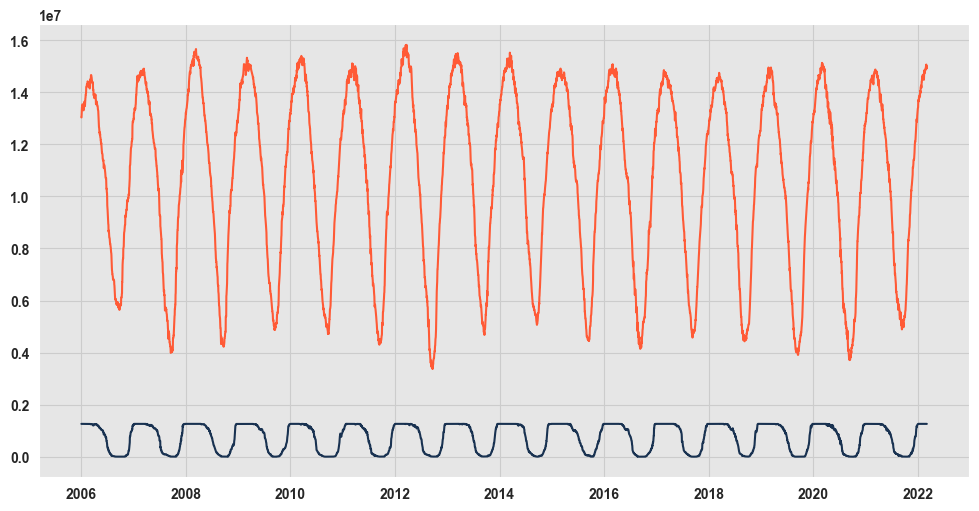

In [47]:
plt.plot(df_hb['datetime'], df_hb['HB_extent'])
plt.plot(df_hb['datetime'], df_hb['total_extent_north']);

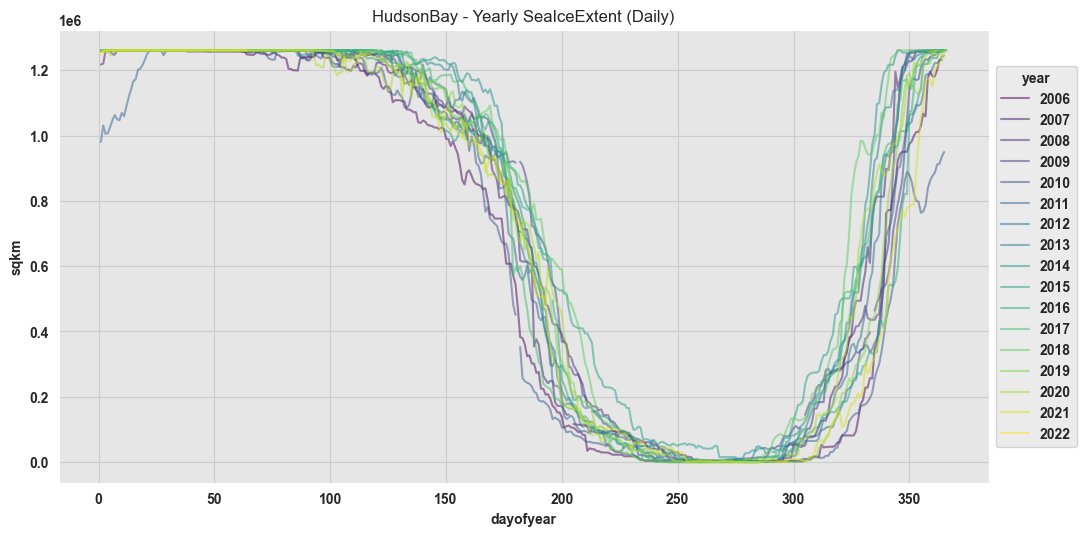

In [48]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df_hb[['year', 'dayofyear', 'HB_extent']], index='dayofyear', columns='year') \
    ['HB_extent'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='HudsonBay - Yearly SeaIceExtent (Daily)', ylabel=r'sqkm');

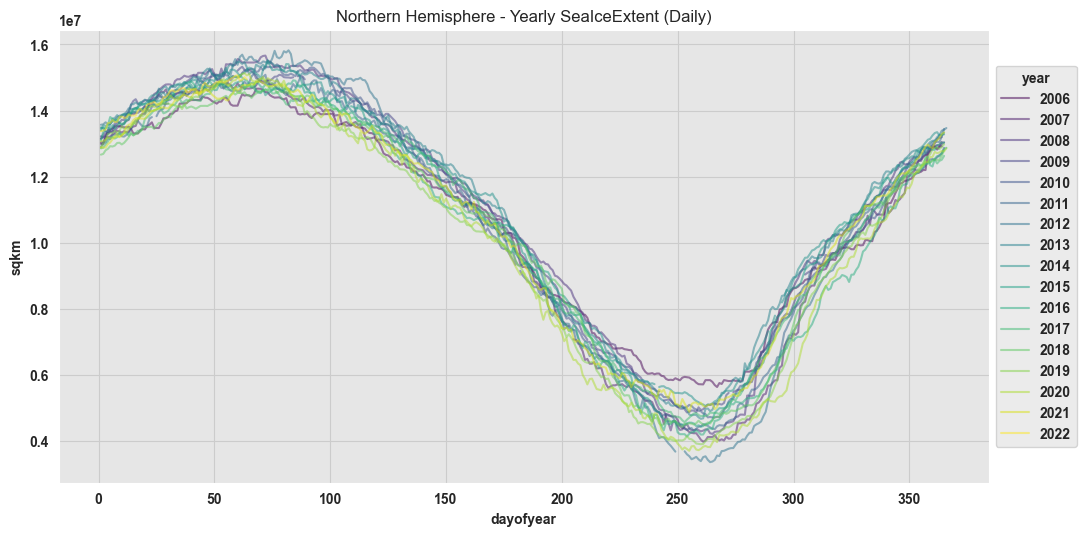

In [49]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df_hb[['year', 'dayofyear', 'total_extent_north']], index='dayofyear', columns='year') \
    ['total_extent_north'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Northern Hemisphere - Yearly SeaIceExtent (Daily)', ylabel=r'sqkm');

In [50]:
# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name
import seaborn as sns

In [51]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

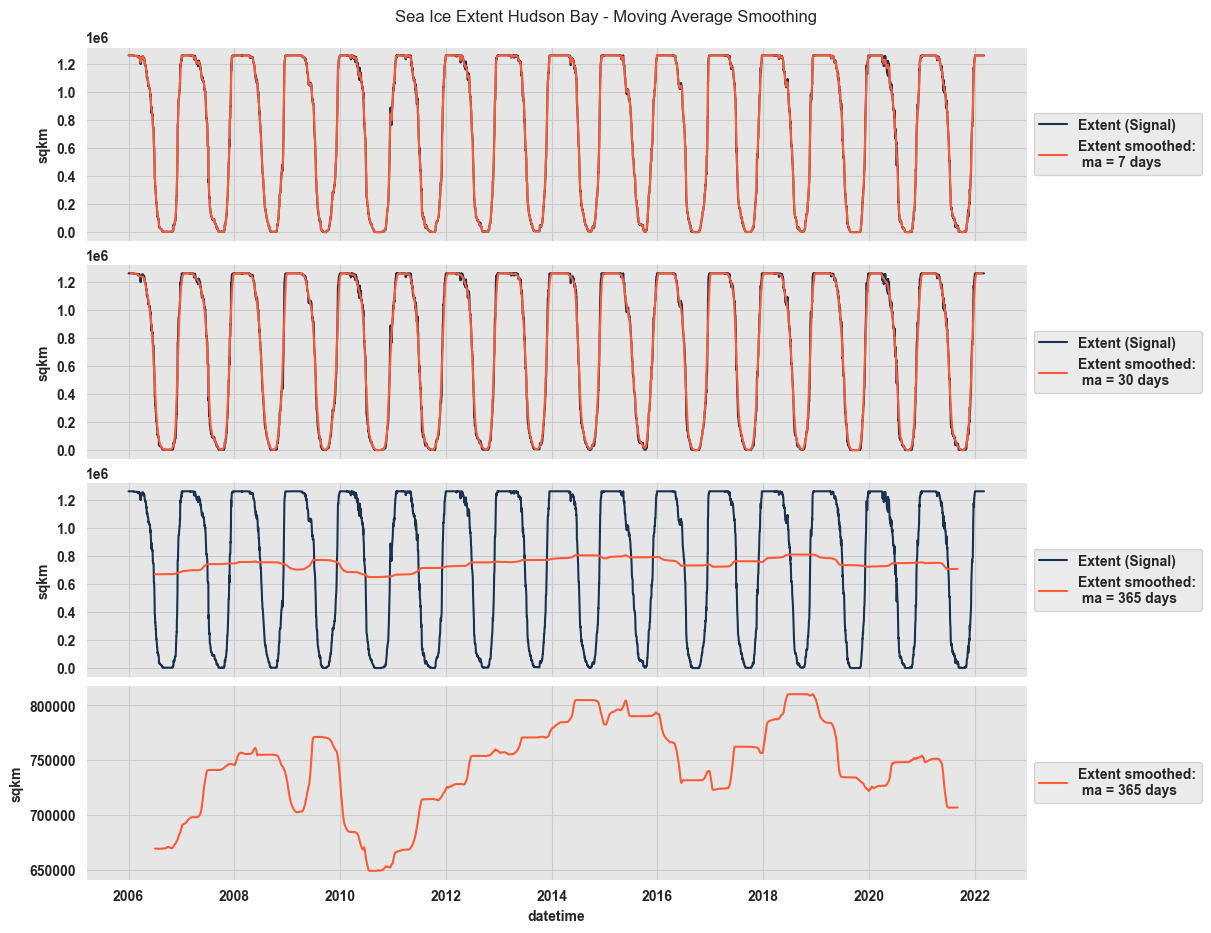

In [52]:
# Plot moving average of different length (week, month, year)
ma = [7, 30, 365]

smooth_daily_df_hb = df_hb
#    .reset_index() \
#    .assign(date = lambda x: x['date'].transform(pd.to_datetime))

# Smooth and plot
fig, ax = plt.subplots(4, 1, figsize=(12, 9), constrained_layout=True,sharex=True)

for i, m in enumerate(ma):

    smooth_daily_df_hb[f'extent_smooth_ma_{m}'] = smooth_daily_df_hb['HB_extent'].rolling(window=m,center=True).mean()

    sns.lineplot(x='datetime', y='HB_extent', label='Extent (Signal)', data=smooth_daily_df_hb,  ax=ax[i])
    sns.lineplot(x='datetime', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=NF_ORANGE, ax=ax[i])


    ax[i].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set(title='', ylabel=r'sqkm');
    
sns.lineplot(x='datetime', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=sns_c[1], ax=ax[i+1])
ax[i+1].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax[i+1].set(title='', ylabel=r'sqkm');
    
    
plt.suptitle('Sea Ice Extent Hudson Bay - Moving Average Smoothing', y=1.02);

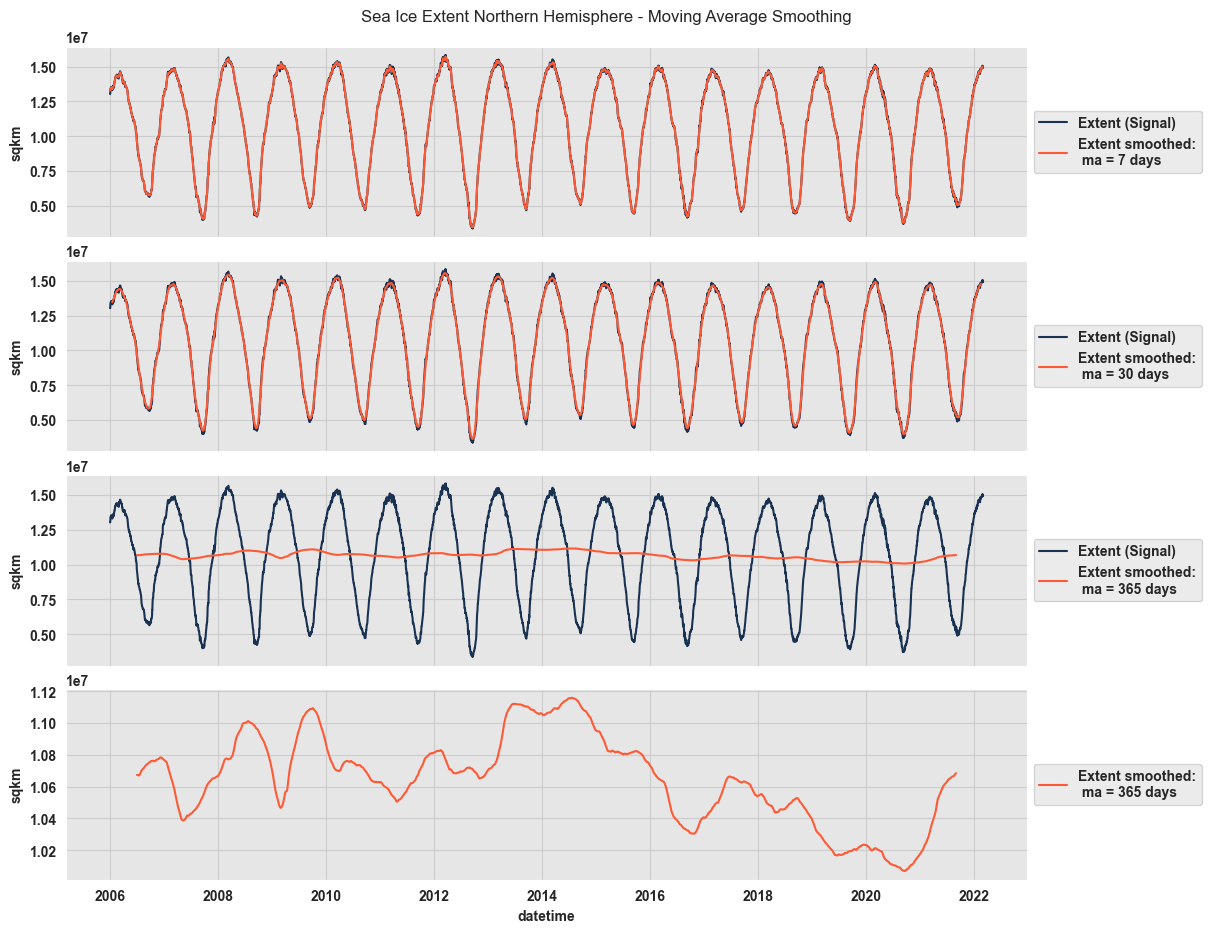

In [53]:
# Plot moving average of different length (week, month, year)
ma = [7, 30, 365]

smooth_daily_df_hb = df_hb
#    .reset_index() \
#    .assign(date = lambda x: x['date'].transform(pd.to_datetime))

# Smooth and plot
fig, ax = plt.subplots(4, 1, figsize=(12, 9), constrained_layout=True,sharex=True)

for i, m in enumerate(ma):

    smooth_daily_df_hb[f'extent_smooth_ma_{m}'] = smooth_daily_df_hb['total_extent_north'].rolling(window=m,center=True).mean()

    sns.lineplot(x='datetime', y='total_extent_north', label='Extent (Signal)', data=smooth_daily_df_hb,  ax=ax[i])
    sns.lineplot(x='datetime', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=NF_ORANGE, ax=ax[i])


    ax[i].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set(title='', ylabel=r'sqkm');
    
sns.lineplot(x='datetime', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=sns_c[1], ax=ax[i+1])
ax[i+1].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax[i+1].set(title='', ylabel=r'sqkm');
    
    
plt.suptitle('Sea Ice Extent Northern Hemisphere - Moving Average Smoothing', y=1.02);

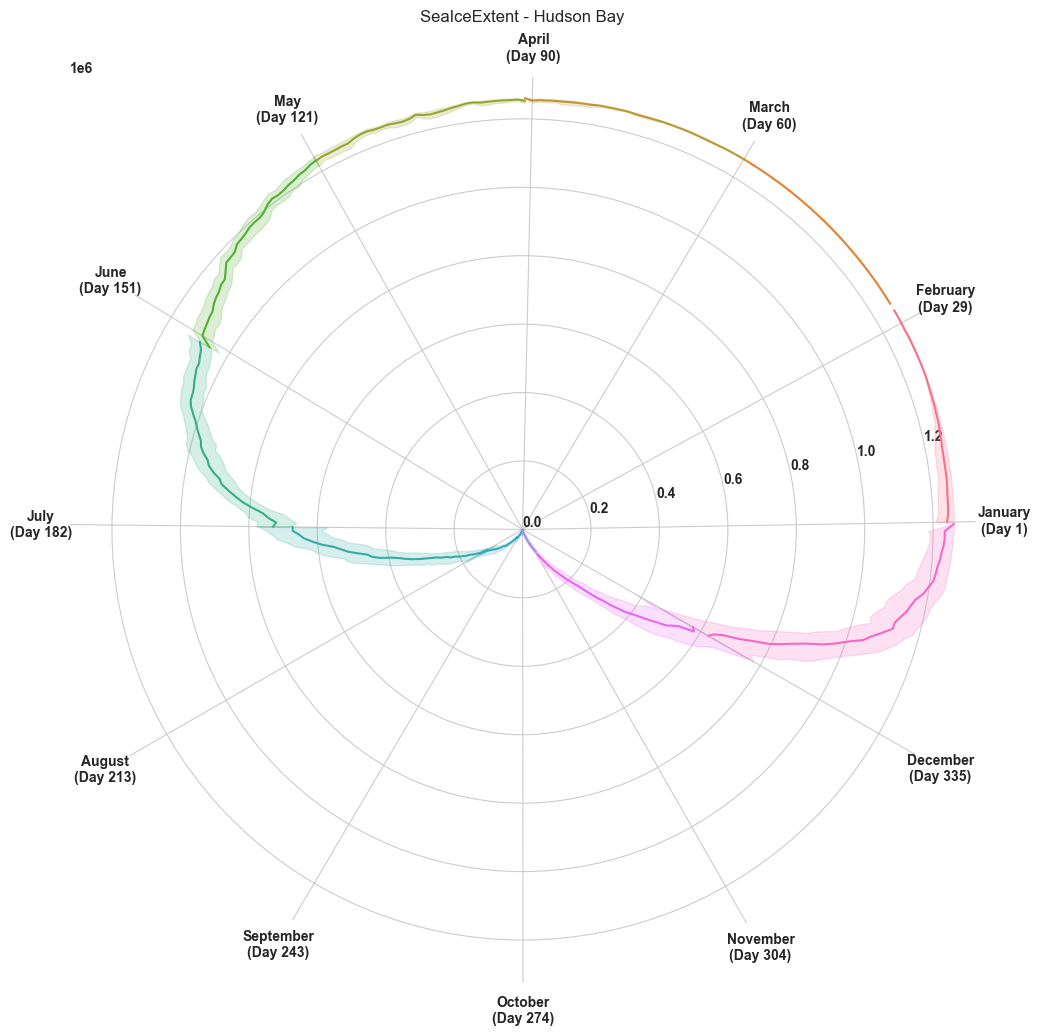

In [54]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df_hb \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='HB_extent', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

days_per_month=[monthrange(2021, i)[1] for i in range(1,13)]                    #findout how many days each month has  
month_theta=(np.array(days_per_month).cumsum()-days_per_month[0]+1)*2*np.pi/365.25 #find the starting day for each month and turn it into an angle 
month_label=[month_name[i] for i in range(1,13)]
month_label=[label+'\n(Day ' +str(int(month_theta[ind]*365.25/np.pi/2)) +')' for ind,label in enumerate(month_label)]

ax.set_facecolor('white')
ax.spines.clear()
ax.set_xticks(month_theta)
ax.set_xticklabels(month_label)
#ax.set_ylim(0,1500000)
#ax.set_yticks(yt:=[0,300000,600000,900000,1200000])
#ax.set_yticklabels([str(t)+'sqkm' for t in yt], rotation = 45)
ax.set_rlabel_position(12) 
ax.xaxis.set_tick_params(which='major',pad=10)

ax.set_rorigin(-5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend().set_visible(False)

ax.set_title('SeaIceExtent - Hudson Bay', va='bottom');
ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

#ax.figure.savefig("Basel_Temp_polar.png")

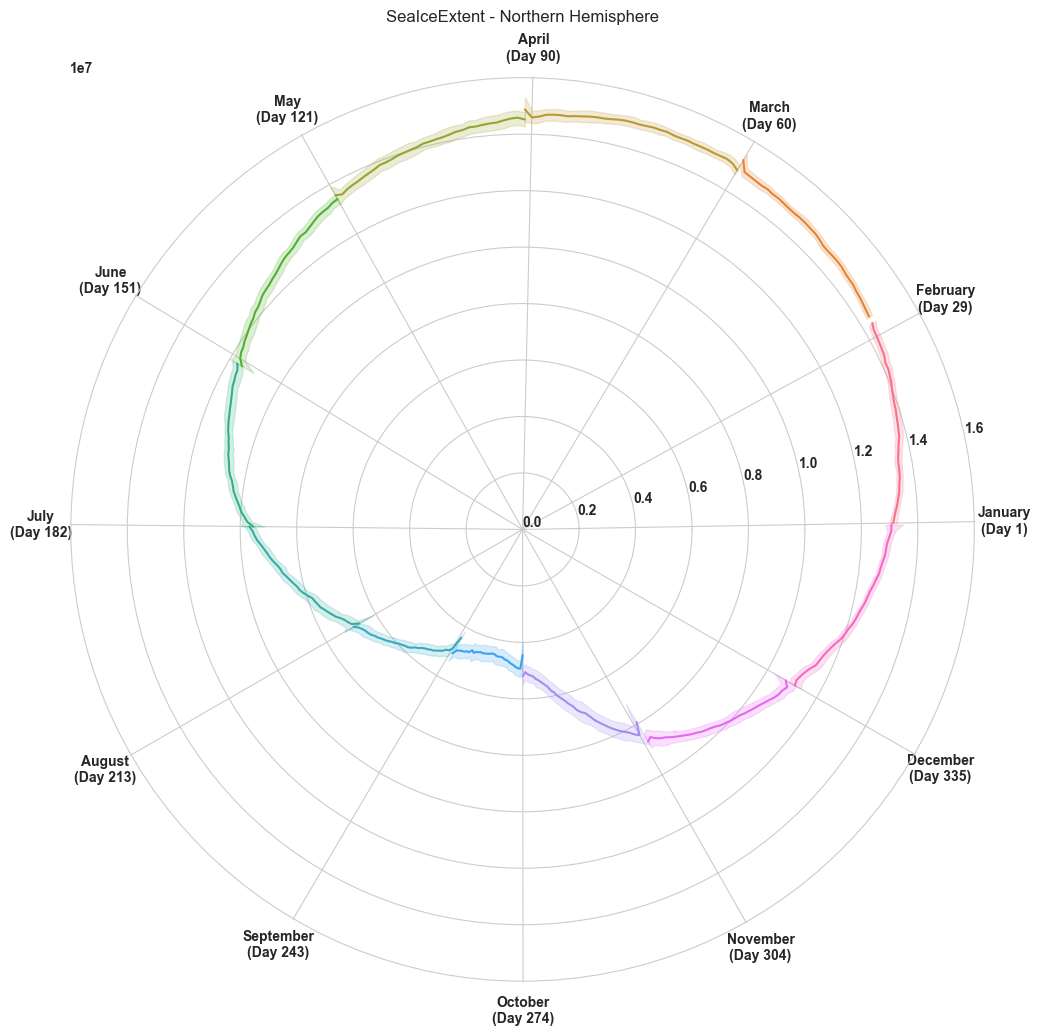

In [55]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df_hb \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='total_extent_north', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

days_per_month=[monthrange(2021, i)[1] for i in range(1,13)]                    #findout how many days each month has  
month_theta=(np.array(days_per_month).cumsum()-days_per_month[0]+1)*2*np.pi/365.25 #find the starting day for each month and turn it into an angle 
month_label=[month_name[i] for i in range(1,13)]
month_label=[label+'\n(Day ' +str(int(month_theta[ind]*365.25/np.pi/2)) +')' for ind,label in enumerate(month_label)]

ax.set_facecolor('white')
ax.spines.clear()
ax.set_xticks(month_theta)
ax.set_xticklabels(month_label)
#ax.set_ylim(0,1500000)
#ax.set_yticks(yt:=[0,300000,600000,900000,1200000])
#ax.set_yticklabels([str(t)+'sqkm' for t in yt], rotation = 45)
ax.set_rlabel_position(12) 
ax.xaxis.set_tick_params(which='major',pad=10)

ax.set_rorigin(-5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend().set_visible(False)

ax.set_title('SeaIceExtent - Northern Hemisphere', va='bottom');
ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

#ax.figure.savefig("Basel_Temp_polar.png")

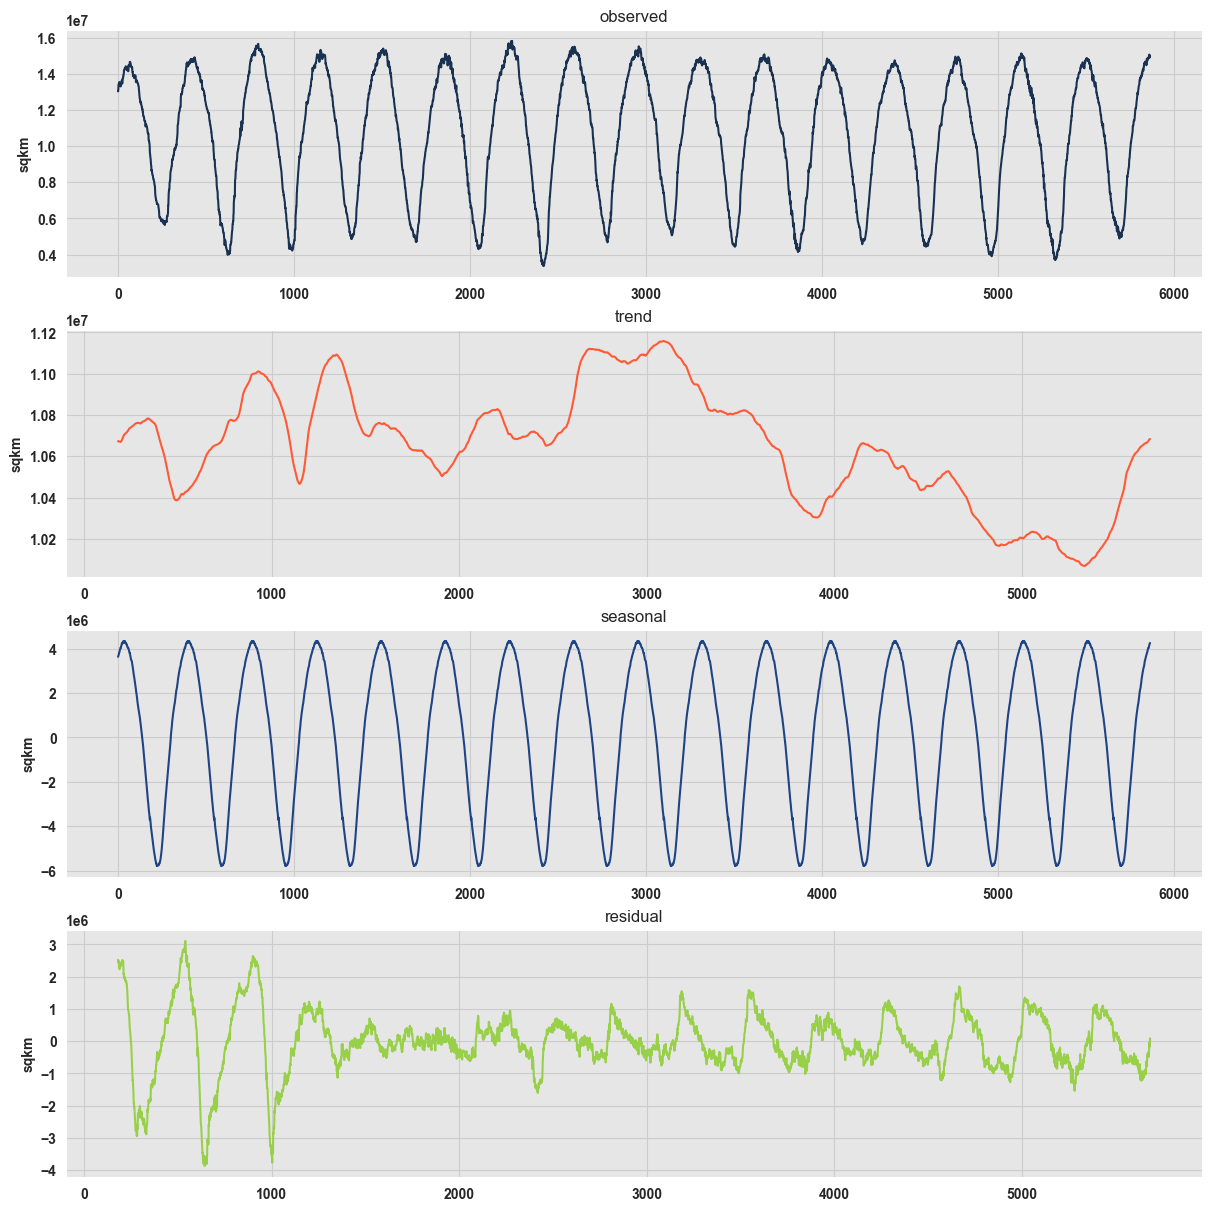

In [56]:
# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    x=df_hb['total_extent_north'], 
    model='additive', 
    period=365
)

# Plot data
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

seas_decomp_yearly.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed', ylabel=r'sqkm')
seas_decomp_yearly.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend', ylabel=r'sqkm')
seas_decomp_yearly.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal', ylabel=r'sqkm')
seas_decomp_yearly.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual', ylabel=r'sqkm');

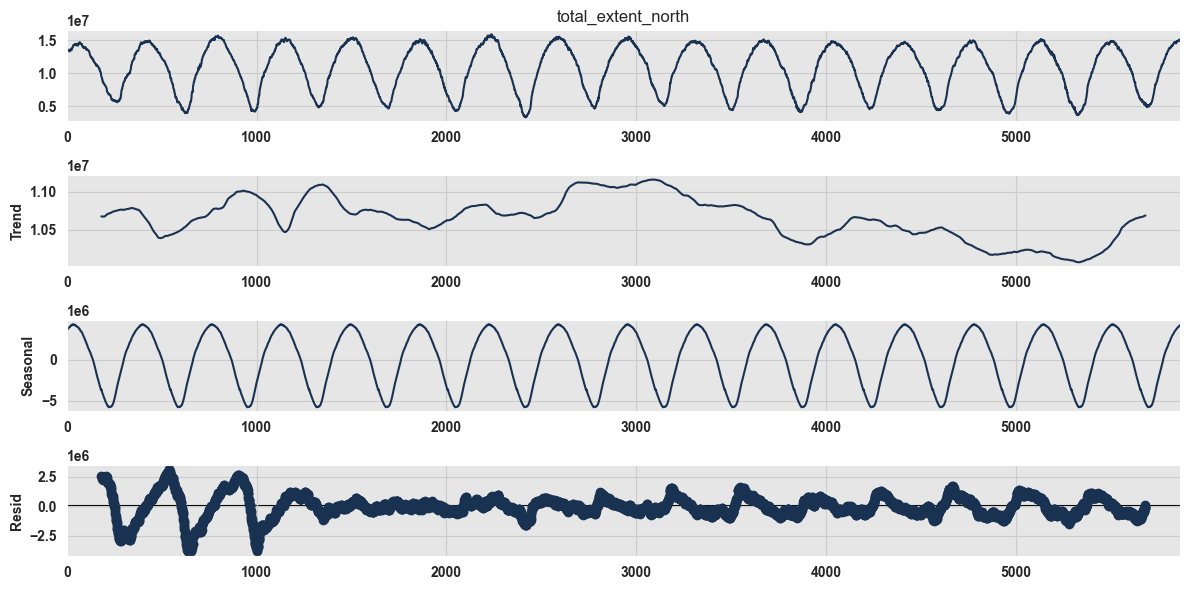

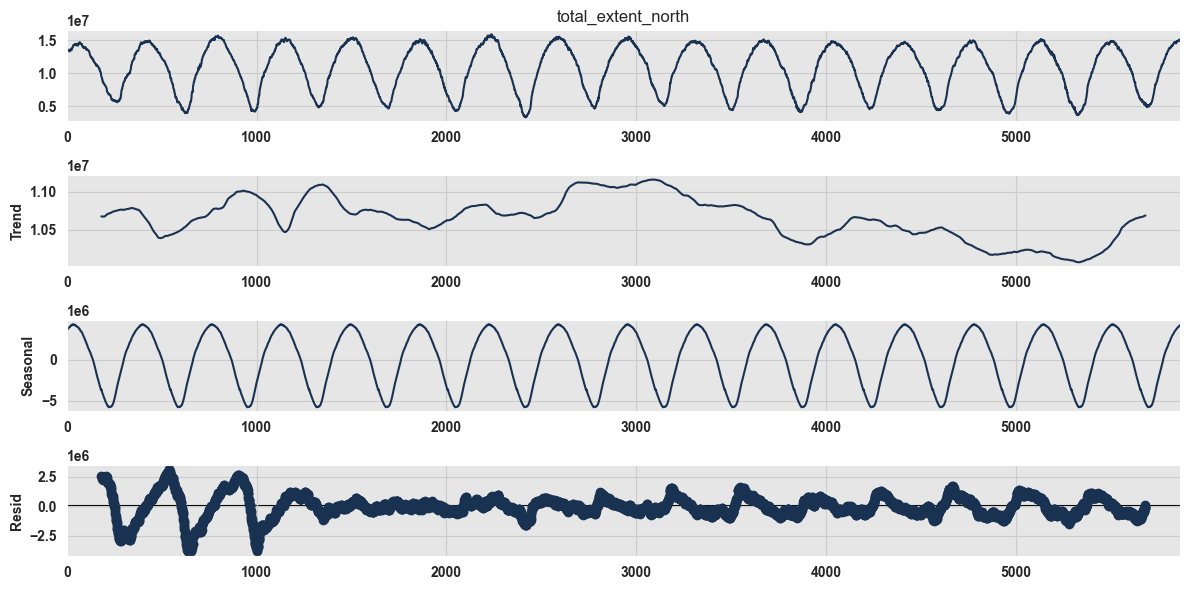

In [57]:
seas_decomp_yearly.plot()